## Week 4 Part 2 Assignment
Group Member:

Ahmed Elsaeyed
Noah Collin
Benson Toi

## Project Overview

Assignment – High Frequency Words

nltk package

The Natural Language Toolkit (NLTK) is an open source Python library for Natural Language Processing. A free online book is available. (If you use the library for academic research, please cite the book.)

Steven Bird, Ewan Klein, and Edward Loper (2009). Natural Language Processing with Python. O’Reilly Media Inc. https://www.nltk.org/book/



## Q1: Choose a corpus of interest.

Using Treebank corpus from NLTK https://www.nltk.org/api/nltk.html

The Treebank corpora provide a syntactic parse for each sentence.



In [63]:
import nltk

import matplotlib.pyplot as plt


## nltk.download('treebank') <--- download package
from nltk.corpus import treebank 
import pandas as pd
from nltk import FreqDist
import matplotlib.pyplot as plt
import operator
import seaborn as sns
%matplotlib inline


words = []
for fileid in treebank.fileids():
    words.extend(treebank.words(fileid))

## Q2: How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).

In [64]:
words=[s.lower() for s in words]
len(words)

100676

In [75]:
print(treebank)

<BracketParseCorpusReader in '/Users/benson/nltk_data/corpora/treebank/combined'>


In [65]:
print(treebank.words())

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', ...]


In [66]:
#all words include non-english
unique_words = set(words)
print (len(unique_words))

11387


In [67]:
# strip punctuation and numerics using isalpha() method
unique_words = [w for w in unique_words if w.isalpha()]
# strip out stop words

# nltk.download('stopwords')
from nltk.corpus import stopwords
unique_words = [w for w in unique_words if w not in stopwords.words('english')]


# How many total unique set of real words are in the corpus
len(set(unique_words))


8989

## Q3: Taking the most common words, how many unique words represent half of the total words in the corpus?

In [68]:
# build the frequency distribution using FreqDist()
words = [w for w in words if w.isalpha()]
from nltk.corpus import stopwords
words = [w for w in words if w not in stopwords.words('english')]

freq_words = nltk.FreqDist(words)

In [69]:
# make a dataframe to produce relative frequencies - all common words
freq_words_all = pd.DataFrame(freq_words.most_common(10000),columns=['word','count'])
freq_words_all['rel_freq'] = freq_words_all['count']/float(len(words))
freq_words_all['Cum_Sum_rel_freq'] = freq_words_all['rel_freq'].cumsum()

#get most common words that make up 50 percent of the total words
len(freq_words_all[freq_words_all['Cum_Sum_rel_freq']<0.5])

641

In [70]:
freq50 =freq_words_all[:len(freq_words_all[freq_words_all['Cum_Sum_rel_freq']<0.5])]
freq50

,word,count,rel_freq,Cum_Sum_rel_freq
0,said,628,0.014050,0.014050
1,million,383,0.008568,0.022618
2,new,328,0.007338,0.029956
3,company,260,0.005817,0.035773
4,says,217,0.004855,0.040627
...,...,...,...,...
636,software,14,0.000313,0.498736
637,aid,14,0.000313,0.499049
638,continuing,14,0.000313,0.499362
639,bad,14,0.000313,0.499676


In [71]:
len(freq50)

641

## Q4: Identify the 200 highest frequency words in this corpus.

In [72]:
top200=freq_words_all[:200]
top200

,word,count,rel_freq,Cum_Sum_rel_freq
0,said,628,0.014050,0.014050
1,million,383,0.008568,0.022618
2,new,328,0.007338,0.029956
3,company,260,0.005817,0.035773
4,says,217,0.004855,0.040627
...,...,...,...,...
195,operations,31,0.000694,0.292848
196,based,31,0.000694,0.293541
197,association,31,0.000694,0.294235
198,corporate,31,0.000694,0.294928


## Q5: Create a graph that shows the relative frequency of these 200 words.

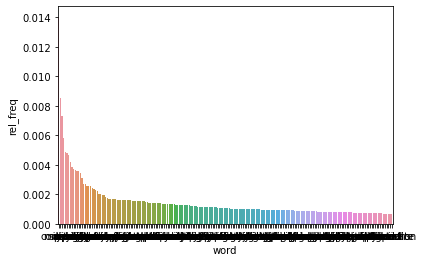

In [73]:
sns.barplot(x=top200.word, y=top200.rel_freq)
plt.rcParams["figure.figsize"] = (200,50)

## Q6: Does the observed relative frequency of these words follow Zipf’s law? Explain.

Zipf's Law is a mysterious relationship that describes the frequency of words. By looking at the relative frequencies of words in a large text, We found the word "said" had 628 counts, then the second word "million" and third word "new" had around 300 counts. And so, the frequency of words shows exponential decay, which explains the relation between the frequency of a set of objects and their size by Zipf's Law.

## Q7: In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

Based on Zipf's law, the frequency of the words in all corpora will show exponential decay in the frequency of words. However, the words might differ in the different corpus.